In [1]:
#pip install pandas

In [93]:
import pandas, json
from datetime import date
import math

In [2]:
#function for getting data from the woolworths api
def download(url = 'http://www.wikipedia.org/',
             target_filename = 'download',
             filename_extension = 'html',
             save_file = True,
             char_set = 'UTF-8',
             lying = False,
             got_the_message = True):

    # Import the function for opening online documents and
    # the class for creating requests
    from urllib.request import urlopen, Request

    # Import an exception raised when a web server denies access
    # to a document
    from urllib.error import HTTPError

    # Open the web document for reading
    try:
        if lying:
            # Pretend to be something other than a Python
            # script (NOT RELIABLE OR RECOMMENDED!)
            request = Request(url)
            request.add_header('User-Agent', 'Mozilla/5.0')
            if not got_the_message:
                print("Warning - Request does not reveal client's true identity.")
                print("          This is both unreliable and unethical!")
                print("          Proceed at your own risk!\n")
        else:
            # Behave ethically
            request = url
        web_page = urlopen(request)
    except ValueError:
        print("Download error - Cannot find document at URL '" + url + "'\n")
        return None
    except HTTPError:
        print("Download error - Access denied to document at URL '" + url + "'\n")
        return None
    except Exception as message:
        print("Download error - Something went wrong when trying to download " + \
              "the document at URL '" + url + "'")
        print("Error message was:", message, "\n")
        return None

    # Read the contents as a character string
    try:
        web_page_contents = web_page.read().decode(char_set)
    except UnicodeDecodeError:
        print("Download error - Unable to decode document from URL '" + \
              url + "' as '" + char_set + "' characters\n")
        return None
    except Exception as message:
        print("Download error - Something went wrong when trying to decode " + \
              "the document from URL '" + url + "'")
        print("Error message was:", message, "\n")
        return None

    # Optionally write the contents to a local text file
    # (overwriting the file if it already exists!)
    if save_file:
        try:
            text_file = open(target_filename + '.' + filename_extension,
                             'w', encoding = char_set)
            text_file.write(web_page_contents)
            text_file.close()
        except Exception as message:
            print("Download error - Unable to write to file '" + \
                  target_filename + "'")
            print("Error message was:", message, "\n")

    # Return the downloaded document to the caller
    return web_page_contents

In [3]:
#reading in dataframe with previous prices
df = pandas.read_csv('out.csv', parse_dates=['Date'], usecols=['Date', 'Name', 'Category', 'Price'])
df

,Date,Name,Category,Price
0,2023-02-09,Fresh Strawberry 250G,Fruit,3.00
1,2023-02-09,White Seedless Grapes Bunch Each,Fruit,6.56
2,2023-02-09,Fresh Blueberries 125G,Fruit,3.50
3,2023-02-09,Driscoll's Fresh Raspberry 125G,Fruit,2.90
4,2023-02-09,Cavendish Bananas Each,Fruit,0.81
...,...,...,...,...
825,2023-04-10,Weis Ice Cream & Fruit Bar Mango & Cream 70ml ...,Frozen,6.50
826,2023-04-10,"Bulla Splits Multipack Raspberry, Mango & Lemo...",Frozen,8.00
827,2023-04-10,Blue Ribbon Streets Reduced Fat Ice Cream Clas...,Frozen,7.00
828,2023-04-10,Connoisseur Ice Cream Vanilla Caramel Brownie 1L,Frozen,12.00


In [4]:
fruit = ['144607', '138801', '169792', '165262', '133211', '120384', '245902', '259514', '310966', '306343', '149885', '141336']
veg = ['524336', '54900', '149620', '147603', '120080', '135369', '134681', '137102', '208895', '144497', '144329', '147071', '169067', '141496', '187314', '162931', '138082', '170127', '713429', 
    '134072', '149374', '132538', '206036']
meat = ['321141', '764465', '577863', '77069', '675318']
fridge = ['208064', '310675', '359118', '194348', '76651', '44317', '96888', '75073', '769558', '43562']
pantry = ['4516', '144283', '45813', '5743', '37679', '96253', '829004', '490219', '813868', '813865', '774157', '94124', '728628', '38921', '280512', '202915', '199725', '192985', '829281', '262206', 
        '713816', '3805', '130502', '573301']
frozen = ['260007', '260010', '754181', '46280', '178953', '140646', '40568', '699140', '180294']
items = [fruit, veg, meat, fridge, pantry, frozen]
categories = ["Fruit", 'Vegetable', 'Meat', 'Fridge','Pantry', 'Frozen']

#getting all the current prices from today
category_counter = 0
for category in items:
    for product in category:
        url = 'https://www.woolworths.com.au/api/v3/ui/schemaorg/product/' + product
        data = json.loads(download(url, lying=True, save_file=False))
        df = pandas.concat([df, pandas.DataFrame([[date.today(), data['name'], categories[category_counter], data['offers']['price']]],
                    columns=['Date', 'Name', 'Category', 'Price'])])
    category_counter = category_counter + 1

df

,Date,Name,Category,Price
0,2023-02-09 00:00:00,Fresh Strawberry 250G,Fruit,3.00
1,2023-02-09 00:00:00,White Seedless Grapes Bunch Each,Fruit,6.56
2,2023-02-09 00:00:00,Fresh Blueberries 125G,Fruit,3.50
3,2023-02-09 00:00:00,Driscoll's Fresh Raspberry 125G,Fruit,2.90
4,2023-02-09 00:00:00,Cavendish Bananas Each,Fruit,0.81
...,...,...,...,...
0,2023-04-17,Weis Ice Cream & Fruit Bar Mango & Cream 70ml ...,Frozen,9.50
0,2023-04-17,"Bulla Splits Multipack Raspberry, Mango & Lemo...",Frozen,6.00
0,2023-04-17,Blue Ribbon Streets Reduced Fat Ice Cream Clas...,Frozen,7.00
0,2023-04-17,Connoisseur Ice Cream Vanilla Caramel Brownie 1L,Frozen,9.00


In [3]:
#saves the current dataframe and reloads it so that the dates are parsed
df.to_csv('out.csv')

NameError: name 'df' is not defined

In [95]:
df = pandas.read_csv('out.csv', parse_dates=['Date'], usecols=['Date', 'Name', 'Category', 'Price'], index_col="Date")

#Cleaning data so there are no $0 prices
def remove_zeroes(row):
    if row.Price == 0:
        return math.nan
    else:
        return row.Price

df.Price = df.apply(remove_zeroes, axis=1)
df

,Name,Category,Price
Date,,,
2023-02-09,Fresh Strawberry 250G,Fruit,3.00
2023-02-09,White Seedless Grapes Bunch Each,Fruit,6.56
2023-02-09,Fresh Blueberries 125G,Fruit,3.50
2023-02-09,Driscoll's Fresh Raspberry 125G,Fruit,2.90
2023-02-09,Cavendish Bananas Each,Fruit,0.81
...,...,...,...
2023-04-17,Weis Ice Cream & Fruit Bar Mango & Cream 70ml ...,Frozen,9.50
2023-04-17,"Bulla Splits Multipack Raspberry, Mango & Lemo...",Frozen,6.00
2023-04-17,Blue Ribbon Streets Reduced Fat Ice Cream Clas...,Frozen,7.00


In [9]:
#TODO: Setup a scheduler so that you don't need to run it every week

,Price
Name,
Beans Round Per Kg,5.536364
Brown Mushrooms Loose Per Kg,7.036364
Cabbage Chinese Wombok Whole Each,5.300000
Cavendish Bananas Each,0.711818
Chicken Thigh Fillet Per Kg,7.363636
...,...
Woolworths Garlic Head Each,1.450000
Woolworths Qukes Baby Cucumbers Punnet 250G,3.536364
Woolworths Red Watermelon Cut Quarter Each,5.900000


In [145]:
#Function used to plot the min, mean and max of each item in a given category
def aggregate_category(category):
    aggregate = df[df.Category == category].groupby("Name").Price.agg(["min", "mean", "max"])
    ax = aggregate.plot.bar(figsize=(20,5))

c:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


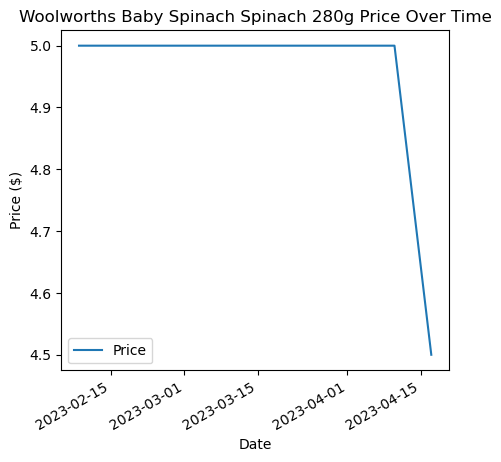

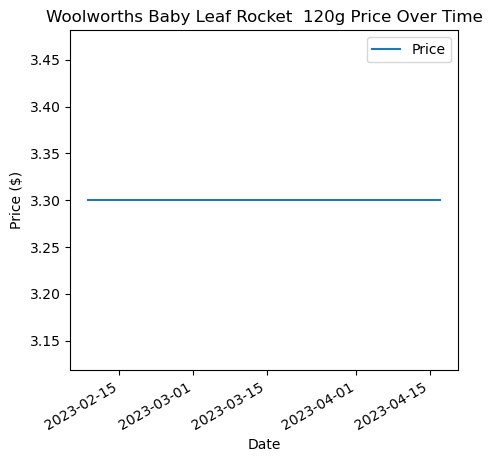

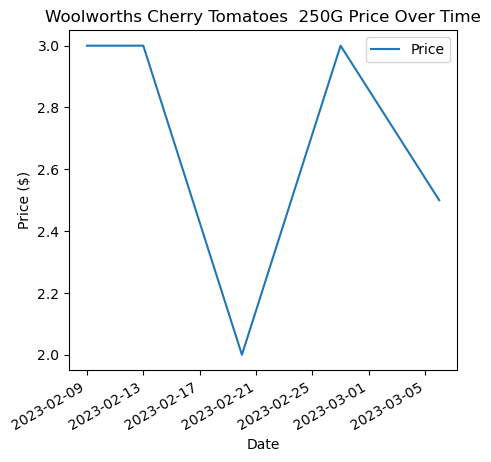

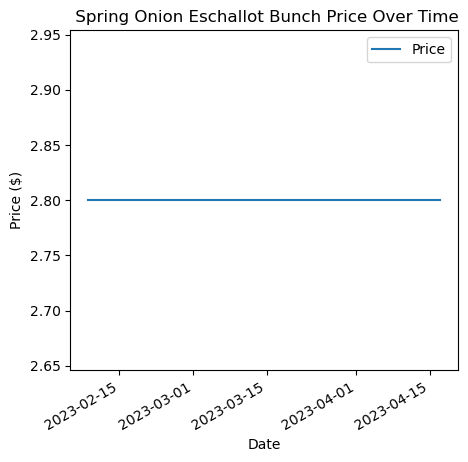

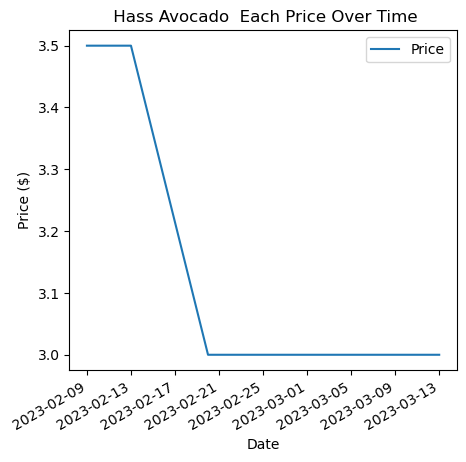

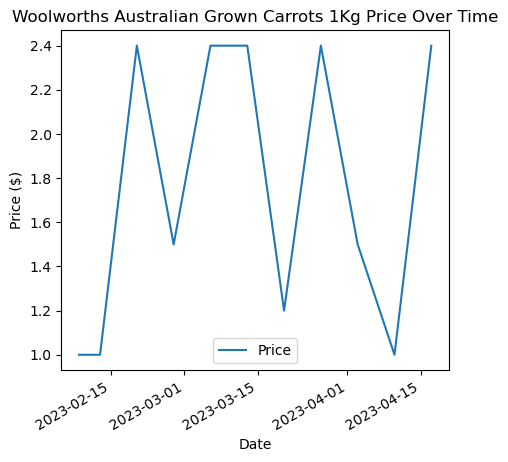

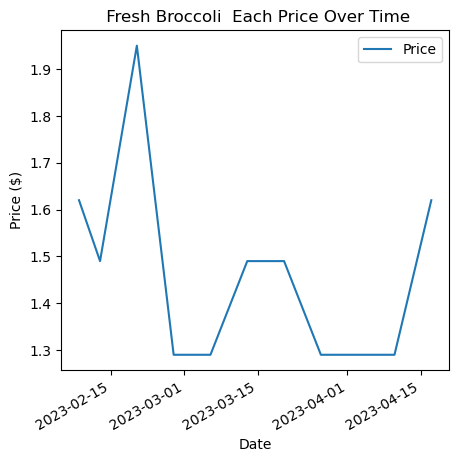

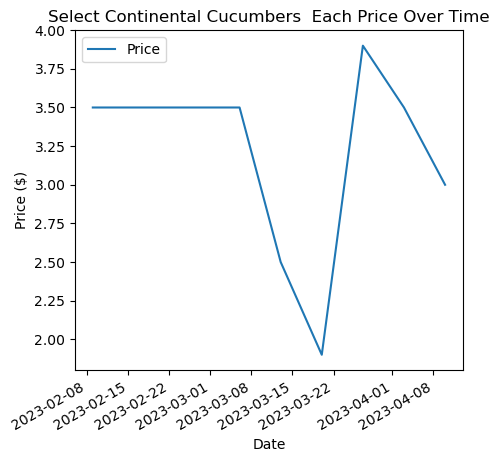

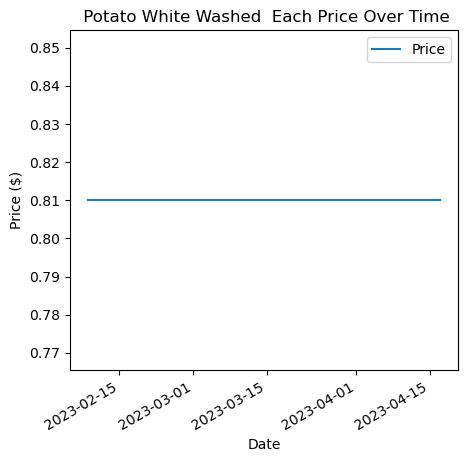

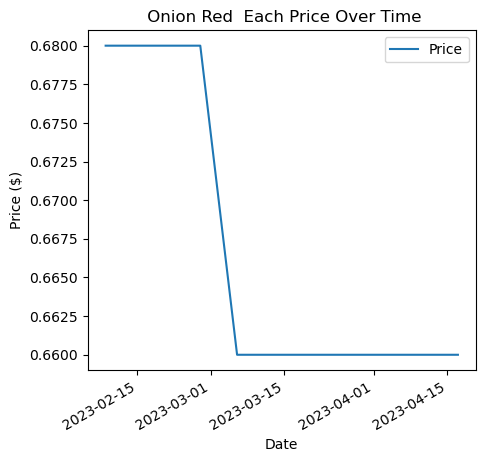

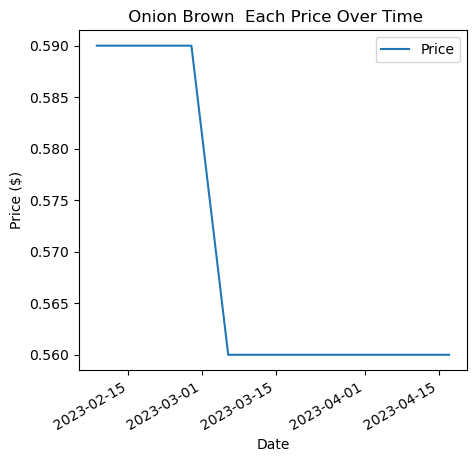

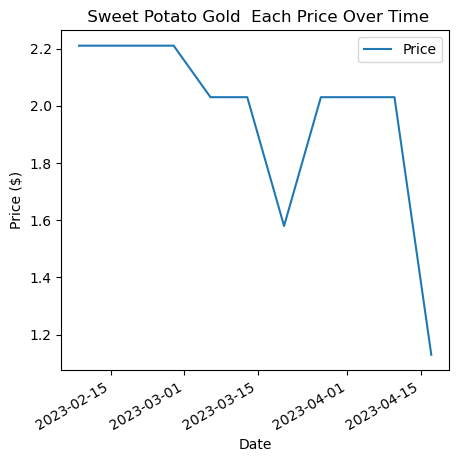

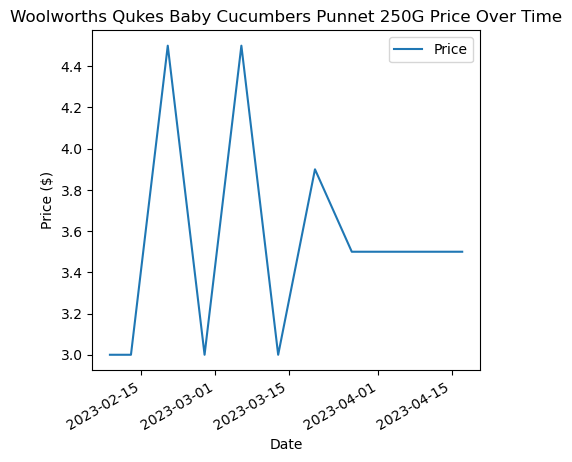

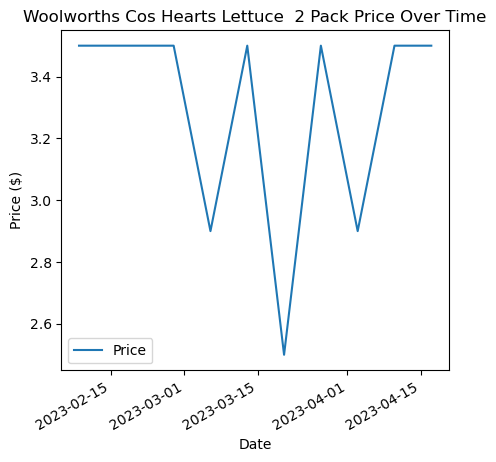

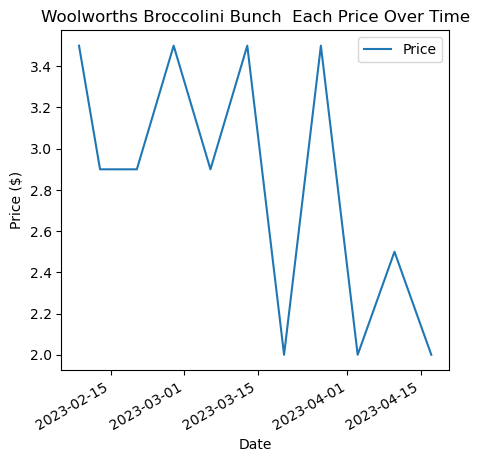

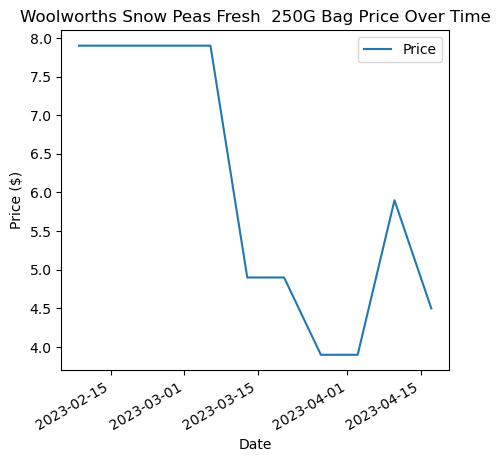

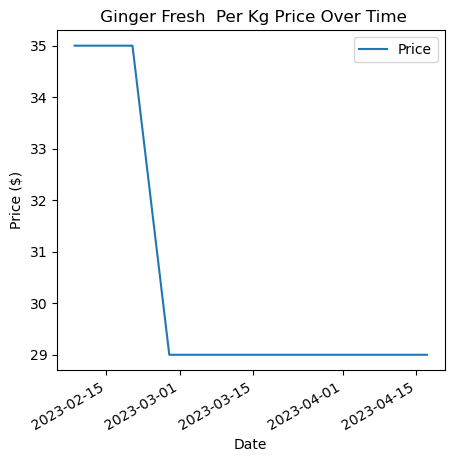

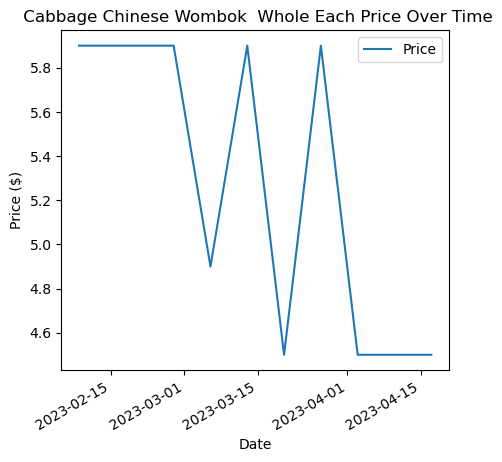

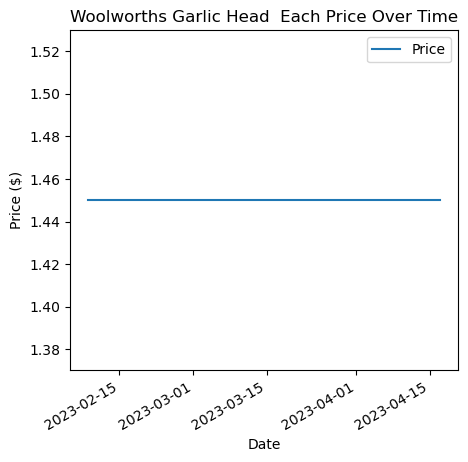

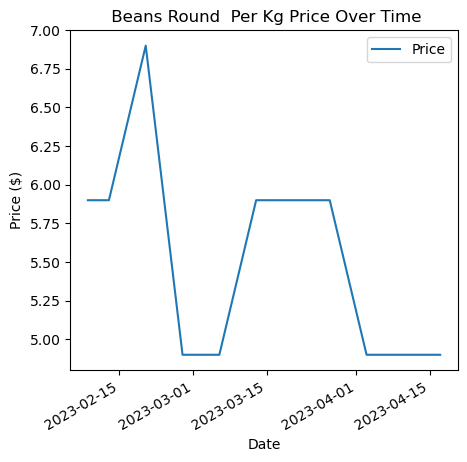

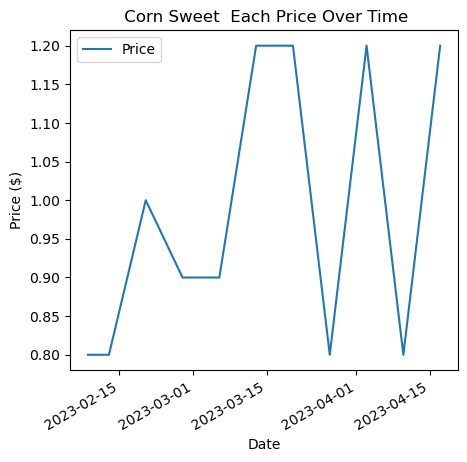

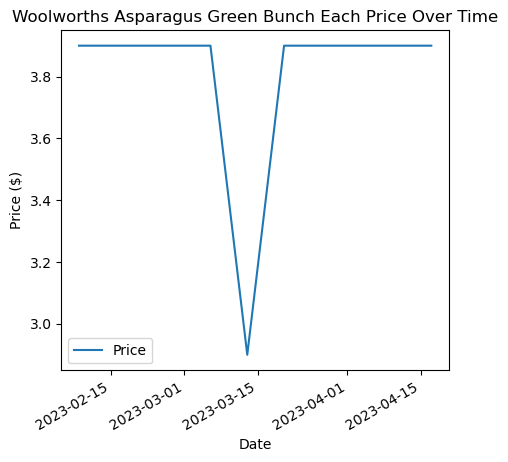

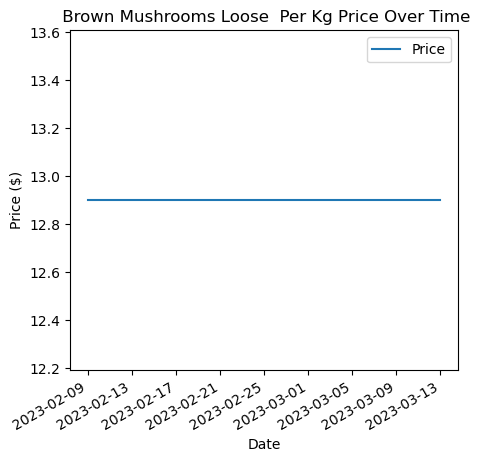

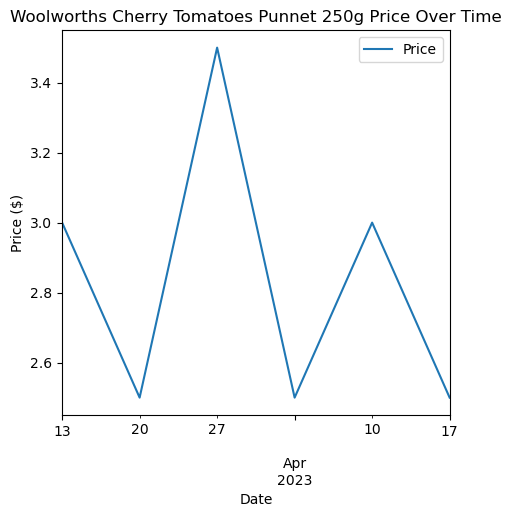

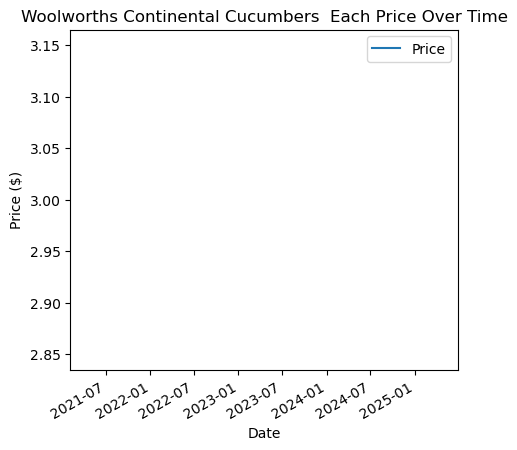

In [167]:
#Looking at the price of seasonal produce (fruit and vegetables) over time. Once we get a year's worth of data, we can see seasonal trends
import matplotlib.pyplot as plt

def item_over_time(name, together=False, ax=None):
        if together:
             df[df.Name.str.contains(name)].plot(figsize=(20,10), ax=ax, label=name)
        else:
            sub_ax = df[df.Name.str.contains(name)].plot(figsize=(5,5))
            sub_ax.set_ylabel("Price ($)")
            sub_ax.set_title(name + " Price Over Time")

def category_over_time(category, together):
    items = df[df.Category == category].Name.unique()
    if together:
        
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_ylabel("Price ($)")
        ax.set_title("Fruit Price Over Time")
        for name in items:
            item_over_time(name, together, ax)

        plt.legend(items, loc='center left', bbox_to_anchor=(1.0, 0.5))
    else:
         for name in items:
            item_over_time(name, together)

category_over_time("Vegetable", False)

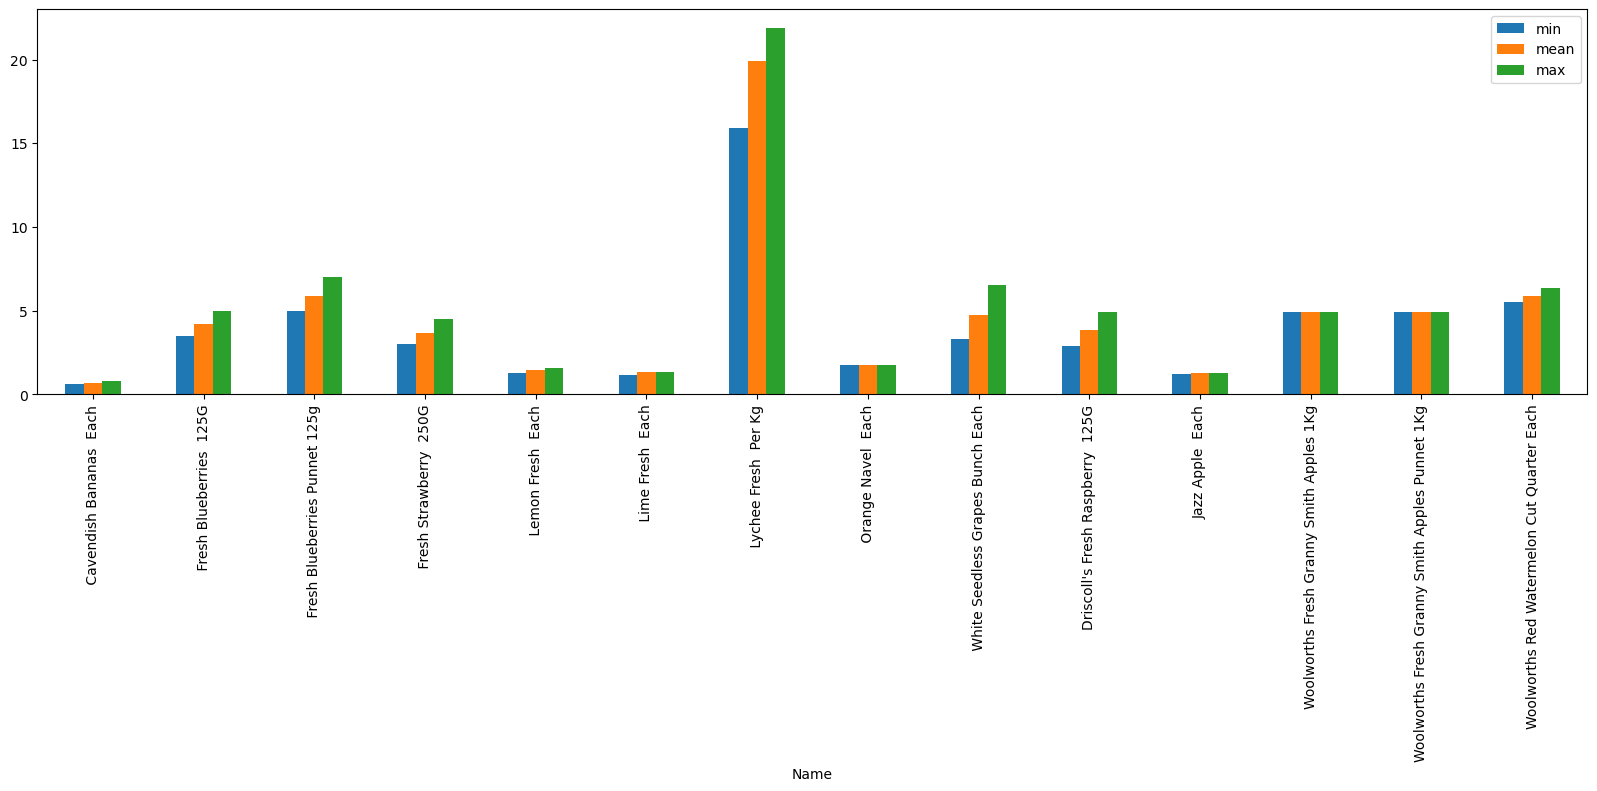

In [151]:
aggregate_category("Fruit")